# Lab 2

We have dealt with univariate data in module 1. All the datasets were multivariate but we were interested in analyzing individual variables, trying to do descriptive and inferential statistics and understanding how values are distributed etc. In this second lab, we will be focusing on dealing with multivariate data.

Univariate vs multivariate data differs only by number of dimensions of data. multivariate can have two or more dimensions.  Often, more than one variable is collected in an experiment or any observation. For example, in a demographic study, many features such as age, sex, race, education, job, income level etc are included in the survey. The datasets will have more than two quantitative variables for each row or observation. First we will try to summarize the data just like how we summarized  univariate data in module 1.

Univariate exploration is not very useful when we have many variables in the datset. We should explore data with more powerful
graphical approaches. Before we jump into the multivariate data analysis we should look into something called bivariate data. 

Let's start working with wine data again but this time the data is little different.

### Bivariate data


Bivariate data has two dimensions of data. 
We will consider abdominal circumference dataset which has three variables **id**, **gawks** and **ac**. 
The abdominal circumference is modelled as a function of gestational age in weeks. 
We will summarize the data analogous to summarizing univariate (single variable) data in module 1.

Can we say, abdominal circumference varies with gestation period. 
As a general conception we can it is true. 
We can try to prove or disprove this assumption by analyzing the data. 
Read the dataset into a dataframe object called 'ac_data'.

In [1]:
ac_data=read.csv("../../../datasets/abdominal circumference/ac.csv")
head(ac_data)

id,gawks,ac
1,12.28571,59
2,12.28571,64
3,12.28571,56
4,12.42857,61
5,12.71429,74
6,12.71429,60


When you look at the first few rows you can't say for sure if long gestation periods will have more abdominal circumference. Lets do a quick check into descriptive statistics of the data.

In [2]:
summary(ac_data)

       id            gawks             ac       
 Min.   :  1.0   Min.   :12.29   Min.   : 56.0  
 1st Qu.:153.2   1st Qu.:20.00   1st Qu.:153.0  
 Median :305.5   Median :27.00   Median :227.0  
 Mean   :305.5   Mean   :27.27   Mean   :226.7  
 3rd Qu.:457.8   3rd Qu.:34.43   3rd Qu.:303.8  
 Max.   :610.0   Max.   :42.43   Max.   :404.0  

We aren't sure if the data is normally distributed for both **gawks** and **ac** variables, but the data looks fine. There are no NA values.  Lets check the data type of variables using str() command.

In [3]:
str(ac_data)

'data.frame':	610 obs. of  3 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gawks: num  12.3 12.3 12.3 12.4 12.7 ...
 $ ac   : int  59 64 56 61 74 60 75 63 62 67 ...


We can try to summarize each variable using a histogram. But the 'ac' variable is integer type. You have seen in previous notebooks that we cannot plot a histogram for an integer variable. so lets convert its datatype to numeric first.

In [4]:
ac_data$ac=as.numeric(ac_data$ac)

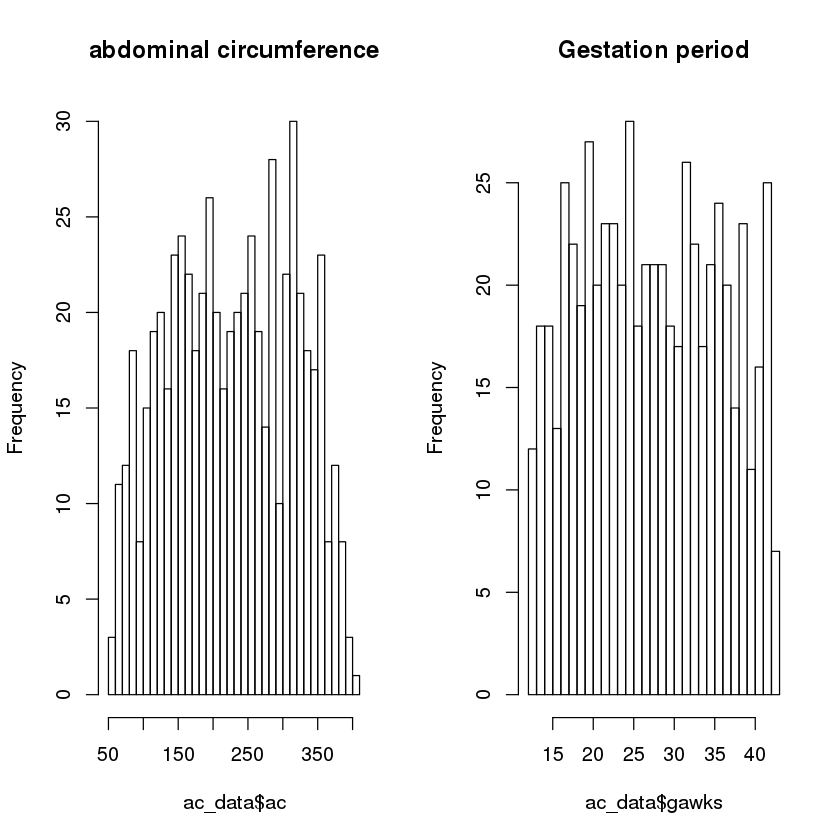

In [5]:
par(mfrow=(c(1,2)))
hist(ac_data$ac,breaks=25,main="abdominal circumference")
hist(ac_data$gawks,breaks=25,main="Gestation period")

The histograms tell us nothing about the relationship between them, if its linear, non linear or no relation at all. Scatter plots are the best way to visualize data to identify relationships.

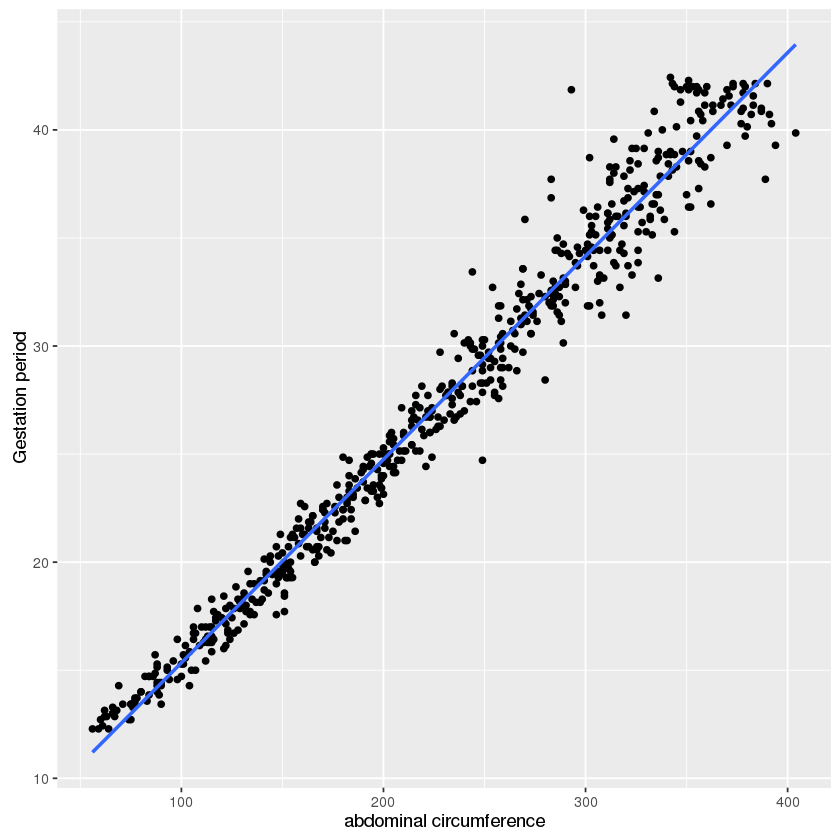

In [6]:
library(ggplot2)

ggplot(ac_data,aes(ac_data$ac,ac_data$gawks))+geom_point()+    
        geom_smooth(method=lm,   # Add linear regression line
                se=FALSE)  +  # Don't add shaded confidence region
xlab("abdominal circumference")+
ylab("Gestation period")

Above plot tells us there is absolutely a positive linear relationship between hand length and foot length

### Pearson correlation coefficient
----


The Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. If the relationship between the variables is not linear, then the correlation coefficient does not adequately represent the strength of the relationship between the variables.

Pearson's **r**(symbol used to denote correlation coefficient) can range from -1 to 1. 
An **r** of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no linear relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables.

To calculate the Pearson(linear) correlation coefficient for a pair of variables, you can use the “cor.test()” function in R.

##### Positive correlation


In [7]:
cor.test(ac_data$gawks,ac_data$ac)


	Pearson's product-moment correlation

data:  ac_data$gawks and ac_data$ac
t = 147.49, df = 608, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9839690 0.9883127
sample estimates:
      cor 
0.9863109 


The correlation coefficient which is about 0.9863109, is a very strong positive correlation. The P-value for the statistical test of whether the correlation coefficient is significantly different from zero is 02.2e-16 is very smaller than 0.05 (which is used as a cutoff for statistical significance). So there is very strong evidence that that the correlation is non-zero.

##### Negative correlation

When the correlation coefficient is negative then there would be negative correlation between variables. Again if the P-value is smaller than 0.05 (which is used as a cutoff for statistical significance) we can say correlation coefficient is different than 0.

##### Zero correlation

When the correlation coefficient is nearly equal to zero, there will bo no correlation between variables. The P-value will be larger than 0.05 indicating correlation is zero.

Now that we have seen how to analyze bivariate data using scatter plots, we will advance our discussion into multivariate data analysis. You will generally start with univariate data analysis followed by bivariate data analysis before plotting complex 3d and 4d plots for multivariate data analysis. 

We will work with wine quality dataset for illustrating multivariate data analysis. The dataset has 11 independent and 1 dependent variable(quality).  

### Loading data

In [8]:
wine_quality <- read.csv("../../../datasets/wine quality/winequality-red.csv", header = T, sep=";")

As usual lets take a quick look at the data, if we read the data correctly into the dataframe.

In [9]:
head(wine_quality)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [10]:
#The structure of the dataframe as follows
# wine_quality$quality<-as.factor(wine_quality$quality)
str(wine_quality)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


Str() gave us an overall sense of the data. All the variables are continous except for quality which is an integer. Lets dig deep into the data by doing some univariate analysis just like what we did in module 1 and progress to multivariate analysis. 

Lets do a summary analysis on all variables

In [ ]:
summary(wine_quality)

Each variable has a different scale of values. Some range from 0 to 1 and some vary over long ranges. Residual sugars seem to have outliers. The value at 75th percentile is 2.6 while the maximum value is 15.5. Thats a big difference. We are not sure at the moment if there are any outliers. A visual plot might help us determine that. We will go ahead and look for any interesting correlations existing between variables. 

### Univariate analysis

Lets go and plot histograms for all 12 variables and have a quick look into distribution of the values.

`gridExtra`: This R library helps you arrange multiple grid-based plots on a page, and draw tables. We are plotting 12 different histograms and arranging them in a grid. 

`ggplot2`: ggplot2 is commonly used package for doing visualizations. It takes care of many of the fiddly details that make plotting a hassle (like drawing legends).

Loading required package: gridExtra


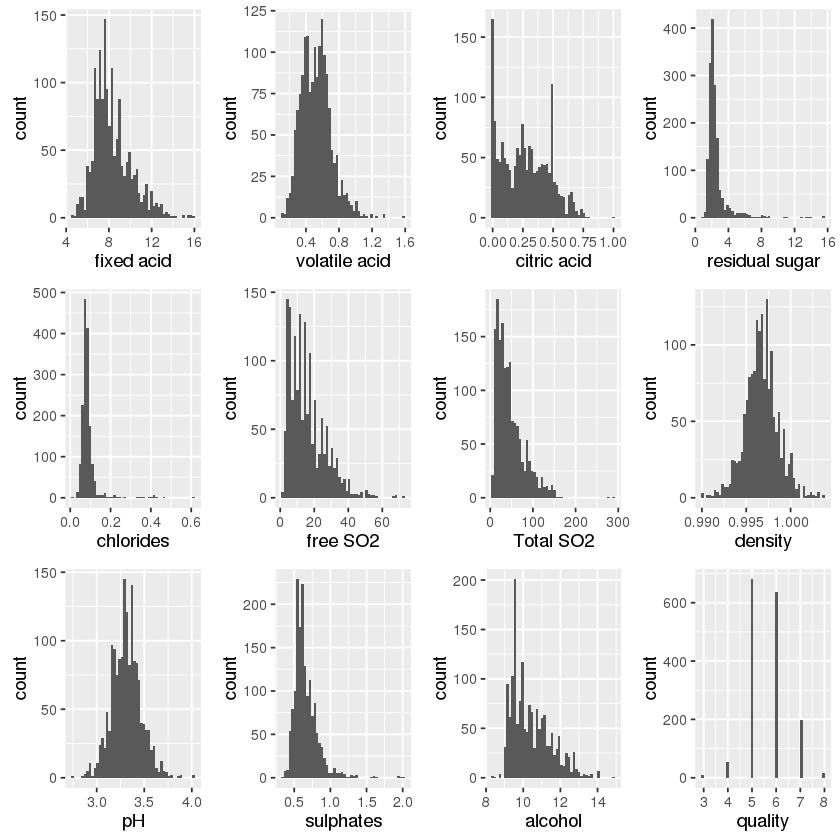

In [11]:
require(gridExtra)
require(ggplot2)

## grid.arrange(x1,x2,x3...xn,ncol=x,nrow=y)
## The command will arrange the plots x1,x2....xn in the desired output of specified rows and columns

# The number of bins should be chosen as appropriate. 
# If you are not sure then trial and error is the best way to figure the 
# right number of bins. Each bin will have number of observations equal to bin size. 

grid.arrange(qplot(wine_quality$fixed.acidity,bins = 50,xlab='fixed acid'),
             qplot(wine_quality$volatile.acidity,bins = 50,xlab='volatile acid'),
             qplot(wine_quality$citric.acid,bins = 50,xlab='citric acid'),
             qplot(wine_quality$residual.sugar,bins = 50,xlab='residual sugar'),
             qplot(wine_quality$chlorides,bins = 50,xlab='chlorides'),
             qplot(wine_quality$free.sulfur.dioxide,bins = 50,xlab='free SO2'),
             qplot(wine_quality$total.sulfur.dioxide,bins = 50,xlab='Total SO2'),
             qplot(wine_quality$density,bins = 50,xlab='density'),
             qplot(wine_quality$pH,bins = 50,xlab='pH'),
             qplot(wine_quality$sulphates,bins = 50,xlab='sulphates'),
             qplot(wine_quality$alcohol,bins = 50,xlab='alcohol'),
             qplot(wine_quality$quality,bins = 50,xlab='quality'),
             ncol = 4)

In [12]:
summary(wine_quality$pH)
summary(wine_quality$density)
summary(wine_quality$alcohol)
summary(wine_quality$residual.sugar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.740   3.210   3.310   3.311   3.400   4.010 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9901  0.9956  0.9968  0.9967  0.9978  1.0040 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.40    9.50   10.20   10.42   11.10   14.90 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.900   1.900   2.200   2.539   2.600  15.500 

### Observations based on histograms

* Wine pH level: The pH is varying with a minimum value 2.74 and max value 4.010 and with mean 3.3.


* Density of the Wine: The density of the wine is spread between 0.9901 and 1.004. Density has normal distribution with a peak between 0.996 and 0.998.

* Alcohol Percentage: From the histogram we can see that alcohol percentage for wine is positively skewed with a peak between 9 and 10.

* Quality:  The wine scores are spread between 3 and 8. Most of the wine samples have scores 5 or 6. Very few samples have rating 3(least) and 8(highest).

* Residual Sugar is highly skewed towards right. We need to analyze more to see if they are outliers or if they are valid measurments.

### Main features in the dataset?

Our variable of interest in the dataset will be quality. We have to identify the independent variables in the datsset which can explain the most of the variability in the dataset and predict the quality of the wine sample. The dataset includes 1599 observations and most of the wine samples have a quality of 5 or 6 with the minimum quality being 3 and maximum quality of 8.

The mean falls right between 5 and 6 at 5.636.

Lets go ahead and subset the dataset based on quality. If the wine quality is 3 or 4, we will subset the rows as bad quality. If the quality is 5 or 6 then subset the rows as medium quality. If the quality is 7 or 8, subset the rows as good quality. 

In [13]:
#Subset function helps you subset the data. It is one of the many ways you can form subsets from a dataset. The pipe operator 
#"|" works like binary `or` operator. "wine_quality$quality == 3 | wine_quality$quality == 4" will select rows where quality is 
#either 3 or 4.

# Another way to look at the subset operators for rows is as the 'WHERE' clause in SQL.

bad_quality <- subset(wine_quality,wine_quality$quality == 3 | wine_quality$quality == 4)
medium_quality <- subset(wine_quality,wine_quality$quality==5 | wine_quality$quality==6)
good_quality <- subset(wine_quality,wine_quality$quality==7 | wine_quality$quality==8)

#Make sure no rows are missed while you are subsetting the data. nrow will return number of rows in a dataframe.  
nrow(bad_quality)+nrow(medium_quality)+nrow(good_quality)

[1] 1599

We are not sure which variables are significant in predicting the quality of wine samples. We can go ahead and raph bi variate plots between quality and rest all independent variables for identifying linear relationships.

quality variable in wine_quality is an integer type variable. We cannot plot a boxplot using integer. We will convert it into a factor as shown below before graphing a box plot. 

In [14]:
wine_quality$quality=as.factor(wine_quality$quality)

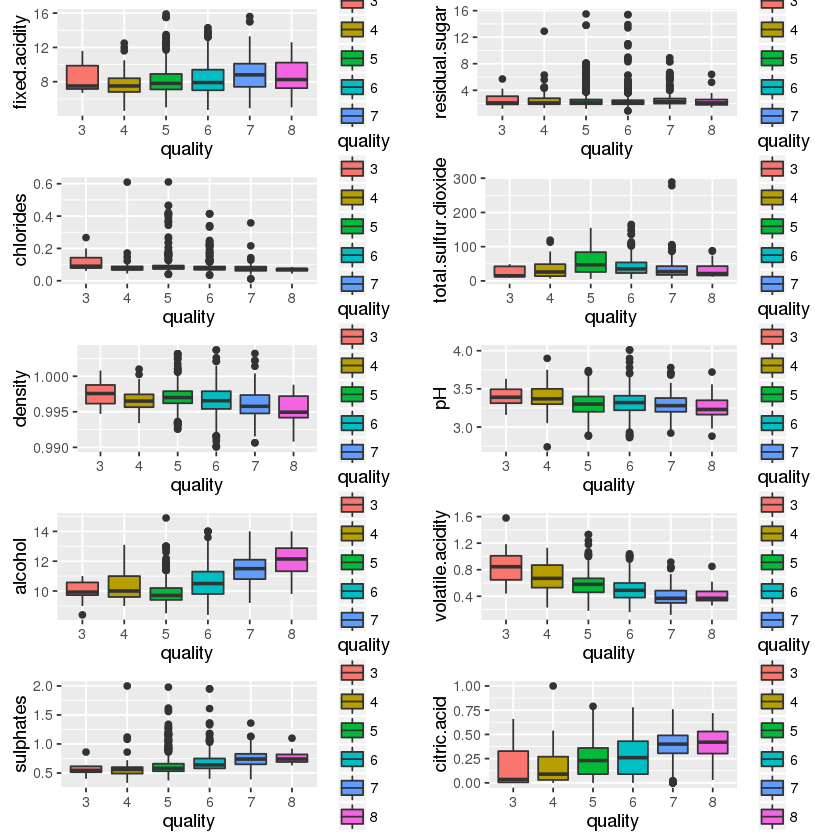

In [15]:
library(ggplot2)
require(gridExtra)

fixed_qua_box <- ggplot(wine_quality, aes(x=quality, y=fixed.acidity,fill=quality)) + geom_boxplot()
sugar_qua_box <- ggplot(wine_quality, aes(x=quality, y=residual.sugar,fill=quality)) + geom_boxplot()
chlorides_qua_box <- ggplot(wine_quality, aes(x=quality, y=chlorides,fill=quality)) + geom_boxplot()
total_sulfur_qua_box <- ggplot(wine_quality, aes(x=quality, y=total.sulfur.dioxide,fill=quality)) + geom_boxplot()
alcohol_qua_box <- ggplot(wine_quality, aes(x=quality, y=alcohol,fill=quality)) + geom_boxplot()
volatile_qua_box <- ggplot(wine_quality, aes(x=quality, y=volatile.acidity,fill=quality)) + geom_boxplot()
sulphates_qua_box <- ggplot(wine_quality, aes(x=quality, y=sulphates,fill=quality)) + geom_boxplot()
citric_qua_box <- ggplot(wine_quality, aes(x=quality, y=citric.acid,fill=quality)) + geom_boxplot()
density_qua_box <- ggplot(wine_quality, aes(x=quality, y=density,fill=quality)) + geom_boxplot()
ph_qua_box <- ggplot(wine_quality, aes(x=quality, y=pH,fill=quality)) + geom_boxplot()
grid.arrange(fixed_qua_box,sugar_qua_box,chlorides_qua_box,total_sulfur_qua_box,density_qua_box,ph_qua_box,alcohol_qua_box,
             volatile_qua_box,sulphates_qua_box,citric_qua_box,ncol=2,nrow=5)
# alcohol_qua_box

alcohol, citric acid, sulphates and fixed.acidity show postive correlation with quality while volatile.acidity, pH and density have negative correlation. The alcohol level is increasing with increasing wine quality same as citric acid level. 

If two variables are varying linearly then they both might give us same kind of information. Both can explain the same amount of variation in the data. So when building a model, we try to skip those kind of variables which are related.

Lets plot scatter lots between variables we identified above. 

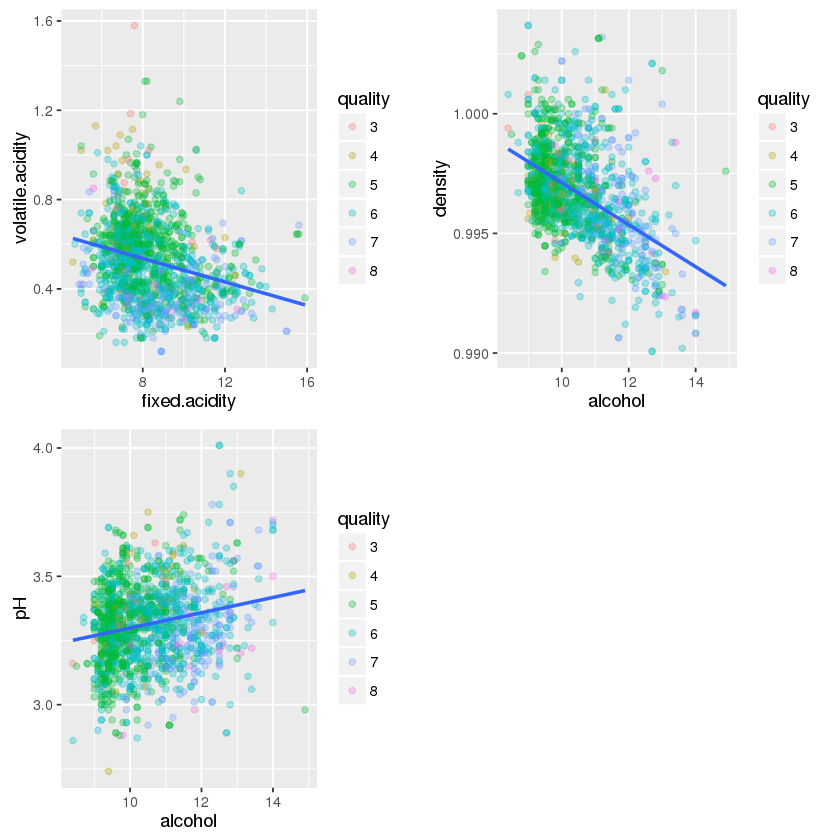

In [16]:
#pH and citric acid are related as both tell acidic nature of wine. Fixed.Acidity and volatile.acidity should tell us same story. 
#We will see how alcohol varies with pH and density. Below plots issustrate the relationships. 

require(gridExtra)

volatile.acidity_fixed.acidity <- ggplot(wine_quality, aes(x=fixed.acidity, y=volatile.acidity))

alcohol_density <- ggplot(wine_quality, aes(x=alcohol, y=density))

alcohol_pH<- ggplot(wine_quality, aes(x=alcohol, y=pH))

grid.arrange(volatile.acidity_fixed.acidity+geom_point(aes(colour = quality),alpha = 0.3)+geom_smooth(method = "lm", se = FALSE), 
             alcohol_density+geom_point(aes(colour = quality),alpha = 0.3)+geom_smooth(method = "lm", se = FALSE),
             alcohol_pH+geom_point(aes(colour = quality),alpha = 0.3)+geom_smooth(method = "lm", se = FALSE),
             ncol=2,nrow=2)

The first plot shows the volatile.acidity/fixed.acidity relationship. Fixed.acidity and volatile.acidity vary inversly with each other. They have relatively moderate negative relation.

The second plot shows the negative relationship between density and alcohol. As the alcohol content increases, density of the win decreases.

The relationship between alcohol and pH is strong and positive. The plot clearly shows as the alcohol content goes up, the pH  increases. 

**NOTE** An error is expected with the next cell.
Please run it, them continue reading.

In [18]:
cor.test(wine_quality$quality,wine_quality$alcohol)

ERROR: Error in cor.test.default(wine_quality$quality, wine_quality$alcohol): 'x' must be a numeric vector


quality is a factor variable now. Lets convert it to numeric format to find pearson correlation coeeficients for all independent variables against response variable quality.

In [ ]:
wine_quality$quality=as.numeric(wine_quality$quality)

In [ ]:
cor.test(wine_quality$quality,wine_quality$alcohol)

We started our data exploration with bunch of histograms and some scatter plots for identifying relationships. Some of the independent variables are related to the quality of wine. We identified list of variables with their corresponding pearson correlation coefficients:

#### Positive Correlation

`Alcohol : 0.476`

`Sulphates : 0.251`

`Citric Acid: 0.226`

`Fixed Acidity: 0.124`

#### Negative Correlation

`Volatile Acidity : -0.391`

`Total SO2 : -0.185`

`Density : -0.175`

`Chlorides : -0.129`

The highest positive relation we can see between any two variables is 0.476 which is not very significant. citric acid is next hihgly positively related feature. Likewise, volatile.acidity and density are negatively related.

In [ ]:
wine_quality <- read.csv("../../../datasets/wine quality/winequality-red.csv", header = T, sep=";")

### Multivariate Plots Section

We were able to reduce the number of independent features to 4 from 11 which we think are significant in explaining the variability in the dataset and predict wine quality. We know each of these variables vary linearly with quality. But we are not sure how they will vary all together. Lets plot some 3d plots to visualize relationships between all the significant features.

In [ ]:
for (i in 1:nrow(wine_quality))
{
  if(wine_quality$quality[i]==3)
      wine_quality$grade[i]='bad'
  if(wine_quality$quality[i]==4)
      wine_quality$grade[i]='bad'
  if(wine_quality$quality[i]==5)
      wine_quality$grade[i]='medium'
  if(wine_quality$quality[i]==6)
      wine_quality$grade[i]='medium'
  if(wine_quality$quality[i]==7)
      wine_quality$grade[i]='good'
  if(wine_quality$quality[i]==8)
      wine_quality$grade[i]='good'
}

In [ ]:
library(gridExtra)
grid.arrange(
ggplot(data = wine_quality,
       aes(x = citric.acid, y = alcohol, color = quality)) +
  geom_point() +
  facet_wrap(~grade),
    
    ggplot(data = wine_quality,
       aes(x = sulphates, y = alcohol, color = quality)) +
  geom_point() +
  facet_wrap(~grade),
    
    ggplot(data = wine_quality,
       aes(x = volatile.acidity, y = alcohol, color = quality)) +
  geom_point() +
  facet_wrap(~grade),
    
    ggplot(data = wine_quality,
       aes(x = total.sulfur.dioxide, y = alcohol, color = quality)) +
  geom_point() +
  facet_wrap(~grade),
    nrow=2,ncol=2)

4 features volatile.acidity, pH, sulhates and alcohol showed correlation with quality. The scatterplots above were faceted by grade to illustrate the population differences between good wines, average wines, and bad wines. Otherwise plots will be a bit crowded. It's clear that a higher citric acid and lower volatile (acetic) acid contributes towards better wines. Likewise, better wines tended to have higher sulphates and alcohol content. Surprisingly, pH had very little visual impact on wine quality, and was shadowed by the larger impact of alcohol. Interestingly, this shows that what makes a good wine depends on the type of acids that are present.

In [ ]:
summary(wine_quality)

In [ ]:
data=wine_quality[c("alcohol","volatile.acidity","sulphates","quality")]

In [ ]:
library(ggplot2)
ggplot(wine_quality, aes(x=alcohol, y=total.sulfur.dioxide, fill=volatile.acidity, color=quality)) + #, size=var5^2
  geom_point(shape=21) +
  scale_color_gradient(low="red", high="green") +
  scale_size_continuous(range=c(1,12))

In [ ]:
#3d boxplot

# install.packages('scatterplot3d',repo='http://cran.us.r-project.org')
library(scatterplot3d)

In [ ]:
library(scatterplot3d)

# plot_3d <- scatterplot3d(data, type = "h", color = data$quality, angle = 55, scale.y = 0.7, pch = 16, 
#main = "Alcohol vs Volatile.acidity vs quality")
# plot_lm <- lm(data$quality ~ data$alcohol + data$volatile.acidity)
# plot_3d$plane3d(plot_lm)
# plot_3d$points3d(seq(10, 20, 2), seq(85, 60, -5), seq(60, 10, -10),col = "red", type = "h", pch = 8)
shapes = c(16, 17, 18,19,20,21) 
shapes <- shapes[as.numeric(data$quality)]
scatterplot3d(data,angle = 45,pch = shapes,
             main="Alcohol vs Volatile acidity vs quality",
              xlab = "Alcohol",
              ylab = "Volatile.acidity",
              zlab = "Quality")

In [ ]:
options(jupyter.plot_mimetypes = 'image/png')

In [ ]:
wine_quality$quality=as.factor(wine_quality$quality)

In [ ]:
# install.packages("car",repo="http://cran.us.r-project.org")
library(car)
# install.packages("rgl",repo="http://cran.us.r-project.org")

library(rgl)
# scatter3d(wine_quality$alcohol,wine_quality$volatile.acidity,wine_quality$sulphates,groups = wine_quality$quality)
plot3d(wine_quality$alcohol,wine_quality$volatile.acidity,wine_quality$sulphates, col=as.numeric(wine_quality$quality), 
       size=0.5, type='s',xlab="alcohol",ylab="volatile.acidity",zlab="sulphates")

In [ ]:
colors <- c("#999999", "#E69F00", "#56B4E9",'magenta','yellow','black')
colors <- colors[as.numeric(data$quality)]
plot<-scatterplot3d(data,angle = 45,color=colors,pch = 16,
              main="Alcohol vs Volatile acidity vs quality",
              xlab = "Alcohol",
              ylab = "Volatile.acidity",
              zlab = "Quality")

              legend(plot$xyz.convert(14, 1.5, 5), legend = levels(data$quality),
              col =  c("#999999", "#E69F00", "#56B4E9"), pch = 16)             

In [ ]:
# install.packages('psych',repo='http://cran.us.r-project.org')
# library(psych)
scatter.hist(x=data$alcohol, y=data$volatile.acidity, xlab='Alcohol',ylab='Volatile acidity',
             density=TRUE, ellipse=TRUE)